cmor0.073-1.0


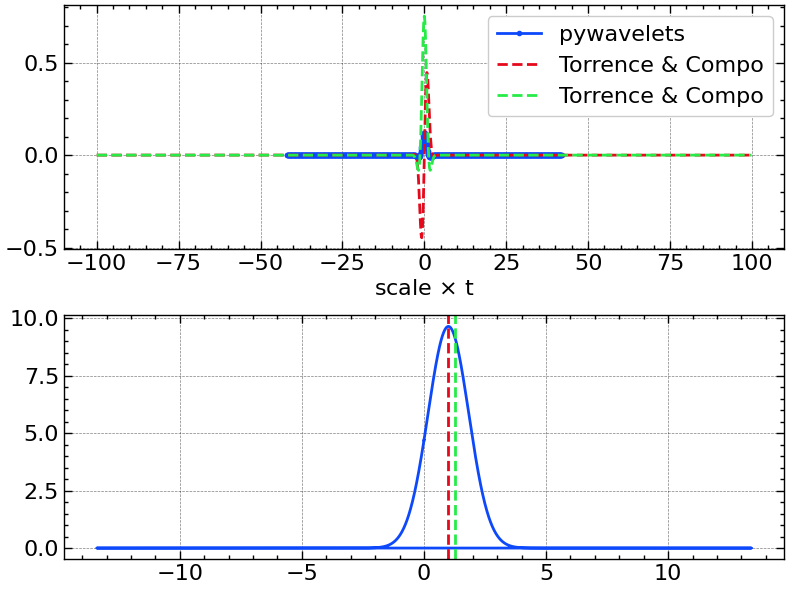

In [129]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'nature', 'notebook', 'grid', 'high-vis'])
%matplotlib ipympl

plt.close()
plt.figure(figsize = (8, 6))
ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

eta = np.linspace(-2, 2, 2 ** 10, endpoint=False)
deta = eta[1] - eta[0]
omega0 = 1.2

B, C = 2 * (omega0 / 2 / np.pi) ** 2, 1.0
print(f"cmor{B:.3f}-{C:.1f}")
[psi, x] = pywt.ContinuousWavelet(f"cmor{B:.2f}-{C:.1f}").wavefun(10)

ax1.plot(x * np.sqrt(2 / B), np.real(psi) / np.sqrt((psi.real ** 2).sum()) * (B / 2) ** 0.25, 'o-', label = 'pywavelets')

x = np.linspace(-100, 100, 2 ** 10, endpoint=False)
dx = x[1] - x[0]
psi_r = (np.pi ** -0.25) * np.exp(-x * x / 2) * np.cos( omega0 * x)
psi_i = (np.pi ** -0.25) * np.exp(-x * x / 2) * np.sin( omega0 * x)
psi = psi_r + 1j * psi_i
# psi -= np.mean(psi)
# psi /= np.sqrt(np.sum(psi ** 2))

ax1.plot(x, psi_i, '--', label = 'Torrence & Compo')
ax1.plot(x, psi_r, '--', label = 'Torrence & Compo')

n = psi.size
n = 2 ** 16
ax2.plot((np.fft.fftfreq( n = n, d = dx)) / (omega0 / 2 / np.pi), np.abs(np.fft.fft(psi, n = n)))

ax2.axvline( 1, color='C1', linestyle='--', label='Fourier Frequency')
ax2.axvline( (omega0 + np.sqrt(2 + omega0 ** 2)) / (2 * omega0), color='C2', linestyle='--', label='Fourier Frequency')

# ax2.plot((ssqueezepy.Wavelet(('morlet', {'mu': 6.0})).xifn()), (np.abs(ssqueezepy.Wavelet(('morlet', {'mu': 6.0})).psifn())))
# ax2.set_xlim(0.0, 2.0)

ax1.legend()
# ax1.plot(, 'C0o-')
ax1.set_xlabel(r'scale $\times$ t')
plt.tight_layout()
plt.show()

7.717546573463091


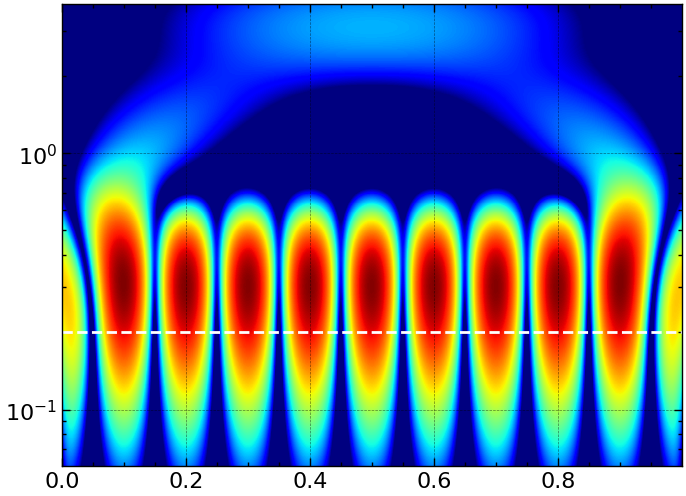

In [215]:
import matplotlib.colors
N = 2 ** 14
t = np.linspace(0, 1, N, endpoint=False)
dt = t[1] - t[0]
fs = 1 / dt
padtyle = 'zero'
omega = 5.0 * 2 * np.pi
sig = np.sin(omega * t)

omega0 = 0.2
mu = omega0
scales = np.geomspace(2 ** 7, 2 ** 13, 120 * 12, endpoint = False)[:-3]
# scales = np.geomspace(2 ** 1, 2 ** 13, 12 * 12, endpoint = False)[:-3]

import ssqueezepy
coef, _ = ssqueezepy.cwt(sig, ('morlet', {'mu': mu}), scales = scales.astype(np.float32), fs = fs, l1_norm = False, padtype = padtyle)
period = dt * scales
plt.close()
ax1 = plt.subplot(1, 1, 1)

scale_to_period = 4 * np.pi / (mu + np.sqrt(2 + mu ** 2))
print(scale_to_period)
period = scale_to_period * scales * dt

ax1.pcolormesh(t, period, np.abs(coef) ** 2, cmap = 'jet', norm = matplotlib.colors.LogNorm(vmax = np.max(np.abs(coef) ** 2), vmin = np.max(np.abs(coef) ** 2) / 100), zorder = -1)
ax1.axhline(2 * np.pi / omega, color='w', linestyle='--', label='Fourier Frequency')

ax1.set_yscale('log')

plt.show()

In [ ]:
pywt.scal2frq(scale = 1.0, wavelet = f"cmor{B:.2f}-{C:.1f}")

np.float64(0.5)